# < RNN Basics >

## 0. Structure of RNN

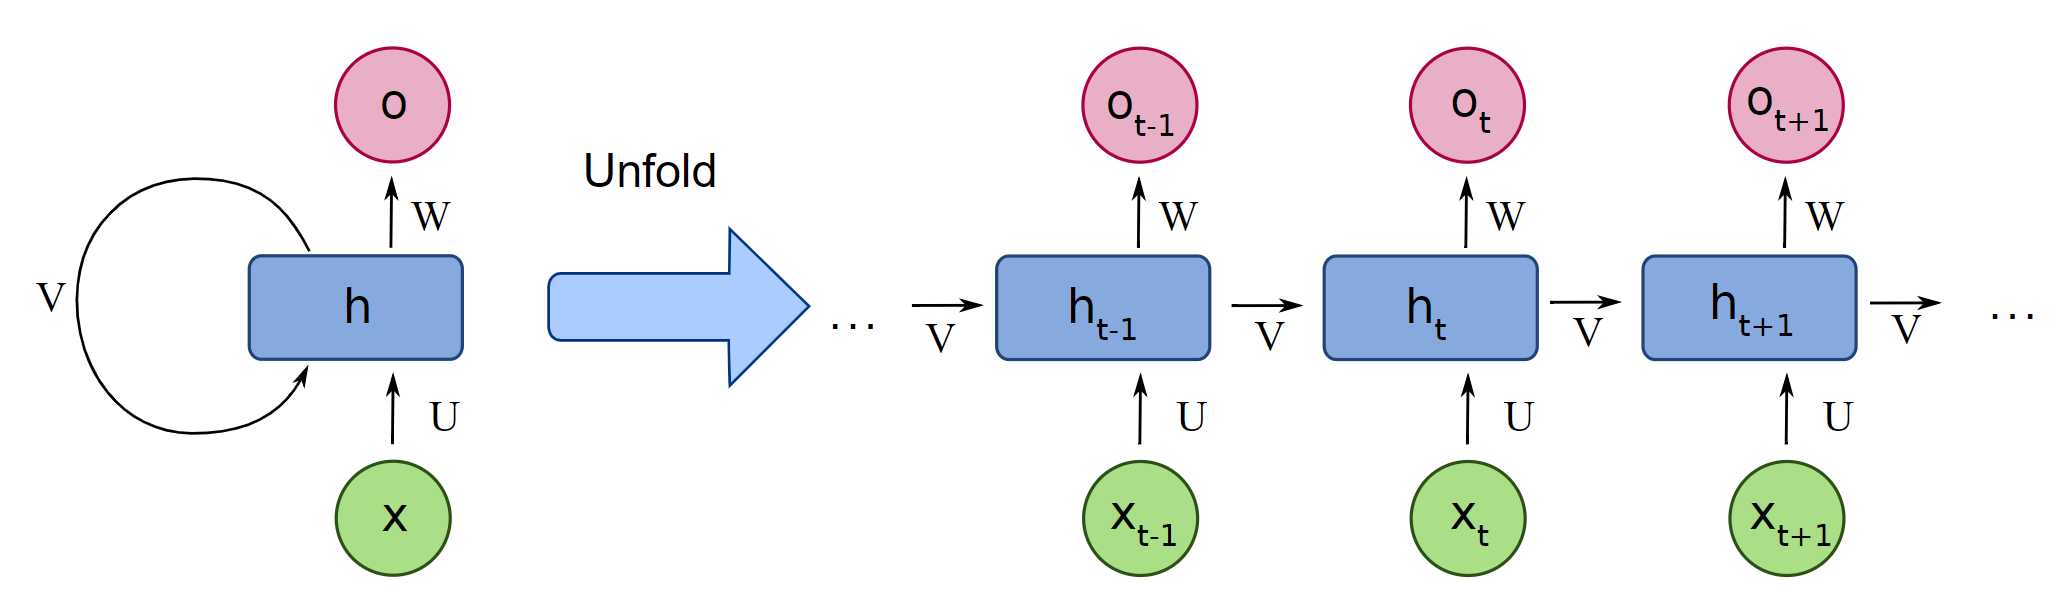

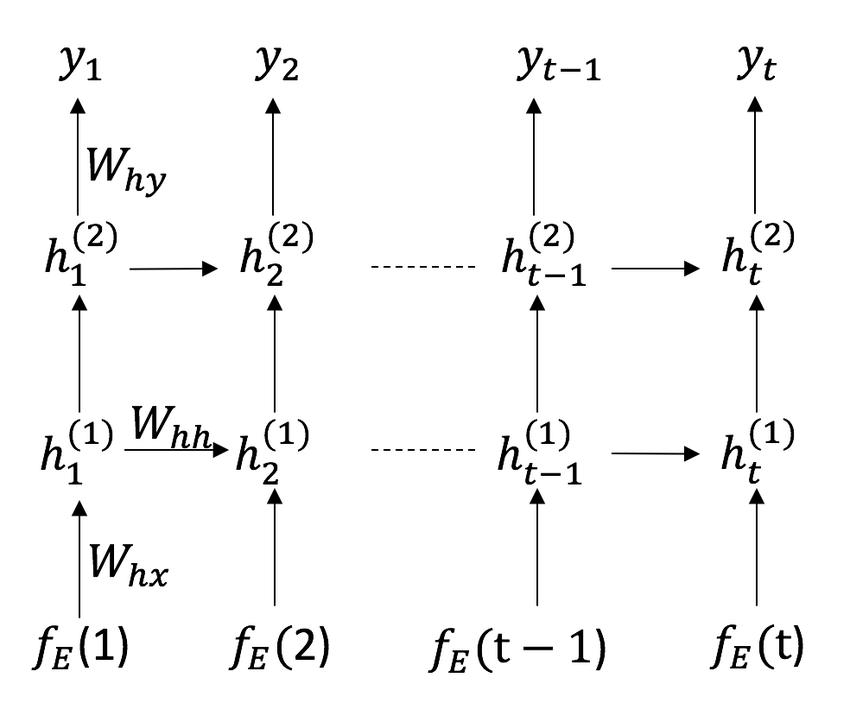

## - Import libraries

In [30]:
import torch
import numpy as np

## - Set GPU Environment

In [56]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

## - Set Hyper-parameters
  

In [57]:
input_dim = 4
hidden_dim = 2

## - Prepare Data

In [58]:
# sequential example
# shape : (3, 5, 4)
# (batch size, seq length, input dim.)
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]
input_data_np = np.array([[h, e, l, l, o], 
                          [e, o, l, l, l], 
                          [l, l, e, e, l]], dtype=np.float32)  #  batch size X seq. length X input dim. = (3, 5, 4)

print(input_data_np.shape)
print(input_data_np)

input_data = torch.Tensor(input_data_np)


(3, 5, 4)
[[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]]


## - Make a RNN Model

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html

In [59]:
rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=1, batch_first=True)

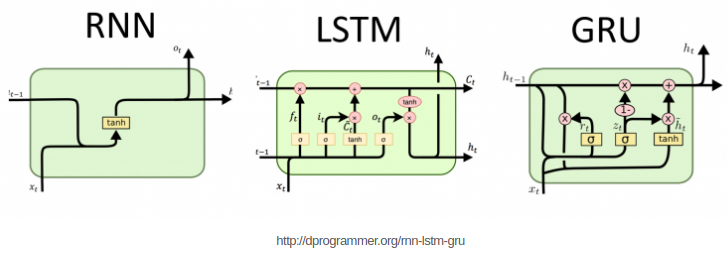

## - Predict by the RNN Model

In [60]:

outputs, h_state = rnn(input_data)

print(outputs.shape, h_state.shape)
print()

print(outputs)
print()

print(h_state)


torch.Size([3, 5, 2]) torch.Size([1, 3, 2])

tensor([[[ 0.7373, -0.4090],
         [ 0.1303,  0.4632],
         [ 0.4427,  0.3029],
         [ 0.4263,  0.3327],
         [ 0.6030, -0.0507]],

        [[ 0.1714,  0.4150],
         [ 0.6191, -0.1071],
         [ 0.4653,  0.1673],
         [ 0.4440,  0.2658],
         [ 0.4318,  0.3129]],

        [[ 0.5255, -0.0259],
         [ 0.4651,  0.1774],
         [ 0.0645,  0.6328],
         [ 0.0435,  0.6944],
         [ 0.4187,  0.3951]]], grad_fn=<TransposeBackward1>)

tensor([[[ 0.6030, -0.0507],
         [ 0.4318,  0.3129],
         [ 0.4187,  0.3951]]], grad_fn=<StackBackward0>)


## - Check Parameters of the RNN Model

In [61]:
[(name, param.shape) for name, param in rnn.named_parameters()]

[('weight_ih_l0', torch.Size([2, 4])),
 ('weight_hh_l0', torch.Size([2, 2])),
 ('bias_ih_l0', torch.Size([2])),
 ('bias_hh_l0', torch.Size([2]))]

## - Make a LSTM Model

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

In [62]:
lstm = torch.nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)

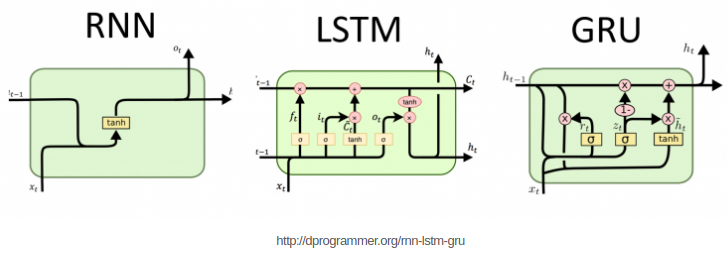

## - Predict by the LSTM Model

In [63]:

outputs, (h_state, c_state) = lstm(input_data)

print(outputs.shape, h_state.shape, c_state.shape)
print()

print(outputs)
print()

print(h_state)
print()

print(c_state)
print()


torch.Size([3, 5, 2]) torch.Size([1, 3, 2]) torch.Size([1, 3, 2])

tensor([[[ 0.2972, -0.0069],
         [ 0.2142,  0.0189],
         [ 0.3935,  0.2200],
         [ 0.3933,  0.3375],
         [ 0.3351,  0.1616]],

        [[ 0.1839,  0.0339],
         [ 0.3188, -0.0212],
         [ 0.3840,  0.1793],
         [ 0.3914,  0.3136],
         [ 0.3939,  0.3936]],

        [[ 0.3267,  0.2111],
         [ 0.3778,  0.3335],
         [ 0.2323,  0.1940],
         [ 0.2420,  0.1611],
         [ 0.4075,  0.3423]]], grad_fn=<TransposeBackward0>)

tensor([[[0.3351, 0.1616],
         [0.3939, 0.3936],
         [0.4075, 0.3423]]], grad_fn=<StackBackward0>)

tensor([[[0.9679, 0.3242],
         [1.0767, 0.7814],
         [1.1291, 0.6569]]], grad_fn=<StackBackward0>)



## - Check Parameters of the LSTM Model

In [64]:
[(name, param.shape) for name, param in lstm.named_parameters()]

# [4 * hidden_dim, input_dim]

[('weight_ih_l0', torch.Size([8, 4])),
 ('weight_hh_l0', torch.Size([8, 2])),
 ('bias_ih_l0', torch.Size([8])),
 ('bias_hh_l0', torch.Size([8]))]

## - Make a GRU Model

https://pytorch.org/docs/stable/generated/torch.nn.GRU.html

In [65]:
gru = torch.nn.GRU(input_dim, hidden_dim, num_layers=1, batch_first=True)

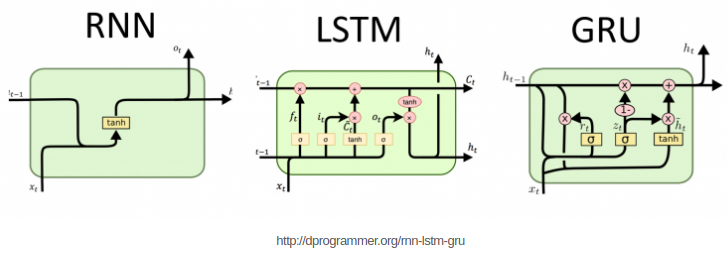

## - Predict by the GRU Model

In [66]:

outputs, h_state = gru(input_data)

print(outputs.shape, h_state.shape)
print()

print(outputs)
print()

print(h_state)
print()


torch.Size([3, 5, 2]) torch.Size([1, 3, 2])

tensor([[[-3.9953e-01,  1.7514e-01],
         [-3.9298e-01,  1.3097e-01],
         [-4.0316e-01,  3.7928e-02],
         [-4.1622e-01, -4.0183e-04],
         [-4.9251e-01,  1.7028e-01]],

        [[-2.3342e-01,  9.1632e-03],
         [-3.8369e-01,  1.6315e-01],
         [-3.9495e-01,  5.0671e-02],
         [-4.1011e-01,  3.9008e-03],
         [-4.2300e-01, -1.3741e-02]],

        [[-1.7383e-01, -6.5548e-02],
         [-2.7940e-01, -7.1591e-02],
         [-3.7226e-01, -2.0240e-02],
         [-4.1000e-01,  1.3793e-02],
         [-4.2225e-01, -9.6304e-03]]], grad_fn=<TransposeBackward1>)

tensor([[[-0.4925,  0.1703],
         [-0.4230, -0.0137],
         [-0.4223, -0.0096]]], grad_fn=<StackBackward0>)



## - Check Parameters of the GRU Model

In [67]:
[(name, param.shape) for name, param in gru.named_parameters()]

# [3 * hidden_dim, input_dim]

[('weight_ih_l0', torch.Size([6, 4])),
 ('weight_hh_l0', torch.Size([6, 2])),
 ('bias_ih_l0', torch.Size([6])),
 ('bias_hh_l0', torch.Size([6]))]